# Prepare the GB1 dataset for easy packaging and loading into MAVE-NN

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Insert mavenn at beginning of path
import sys
path_to_mavenn_local = '../../../../'
sys.path.insert(0,path_to_mavenn_local)

#Load mavenn and check path
import mavenn
print(mavenn.__path__)

# MAVE-NN utilities
from mavenn.src.mavedb import mutations_to_dataset

['../../../../mavenn']


In [2]:
# GB1 WT sequence
wt_seq = 'QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE'

# WT sequence library and selection counts.
i_wt = 1759616
o_wt = 3041819
y_wt = np.log2((o_wt+1)/(i_wt+1))

In [3]:
# Create mut_df
mut0_df = pd.DataFrame(columns=['id','l','c'])

# Create y_df
y0_df = pd.DataFrame()
y0_df['id'] = [0]
y0_df['input_ct'] = [i_wt]
y0_df['selected_ct'] = [o_wt]
y0_df['hamming_dist'] = [0]

# Number of sequences 
N0 = len(y0_df)

# Preview dataframe
y0_df.head()

,id,input_ct,selected_ct,hamming_dist
0,0,1759616,3041819,0


## Create data1_df for 1pt mutants

In [4]:
# load single mutants data
csv_1pt = 'oslon_data_single_mutants_ambler.csv'
olson_1pt_df = pd.read_csv(csv_1pt,
                           na_values="nan")
olson_1pt_df.reset_index(inplace=True, drop=True)
olson_1pt_df.head()

,WT amino acid,Position,Mutation,Input Count,Selection Count
0,Q,2,A,14663,38476
1,Q,2,C,13001,23023
2,Q,2,D,11488,18085
3,Q,2,E,9501,15629
4,Q,2,F,4770,13332


In [5]:
### Prepare mut_df for 2pt mutatnts ###

# Keep only the columns we want
mut1_df = pd.DataFrame()
mut1_df['id'] = olson_1pt_df.index + N0 # For the wt sequence
mut1_df['l'] = olson_1pt_df['Position']
mut1_df['c'] = olson_1pt_df['Mutation']

# Concatenate
mut1_df['l'] = [str(l) for l in mut1_df['l']]
mut1_df.sort_values(by=['id','l','c'], inplace=True)
mut1_df.reset_index(inplace=True, drop=True)

# Compute number of sequences
N1 = max(mut1_df['id'])+1   

# Drop entries where l cannot be cast as an integer. 
import re
ix = [bool(re.match('[0-9\.]+',l)) for l in mut1_df['l']]
mut1_df = mut1_df[ix]
mut1_df['l'] = mut1_df['l'].astype(float).astype(int)-2

print(f'len(mut1_df): {len(mut1_df)}')
print(f'N1: {N1}')
mut1_df.head()

len(mut1_df): 1045
N1: 1046


,id,l,c
0,1,0,A
1,2,0,C
2,3,0,D
3,4,0,E
4,5,0,F


In [6]:
### Prepare mut_df for 1pt mutatnts ###

y1_df = pd.DataFrame()
y1_df['id'] = range(N0,N1)
y1_df['input_ct'] = olson_1pt_df['Input Count']
y1_df['selected_ct'] = olson_1pt_df['Selection Count']
y1_df['hamming_dist'] = 1
print(f'len(y1_df): {len(y1_df)}')
y1_df.head()

len(y1_df): 1045


,id,input_ct,selected_ct,hamming_dist
0,1,14663,38476,1
1,2,13001,23023,1
2,3,11488,18085,1
3,4,9501,15629,1
4,5,4770,13332,1


## Create data2_df for 2pt mutants

In [7]:
# load double mutant data
csv_2pt = 'oslon_data_double_mutants_ambler.csv'
olson_df = pd.read_csv(csv_2pt, na_values="nan")
olson_df.reset_index(inplace=True, drop=True)
olson_df.head()

/Users/jkinney/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Mut1 WT amino acid,Mut1 Position,Mut1 Mutation,Mut2 WT amino acid,Mut2 Position,Mut2 Mutation,Input Count,Selection Count,Mut1 Fitness,Mut2 Fitness
0,Q,2,A,Y,3.0,A,173.0,33.0,1.518,0.579
1,Q,2,A,Y,3.0,C,18.0,8.0,1.518,0.616
2,Q,2,A,Y,3.0,D,66.0,2.0,1.518,0.010
3,Q,2,A,Y,3.0,E,72.0,1.0,1.518,0.009
4,Q,2,A,Y,3.0,F,69.0,168.0,1.518,1.054


In [8]:
### Prepare mut_df for 2pt mutatnts ###

# Keep only the columns we want
df1 = pd.DataFrame()
df1['id'] = olson_df.index + N1
df1['l'] = olson_df['Mut1 Position']
df1['c'] = olson_df['Mut1 Mutation']

df2 = pd.DataFrame()
df2['id'] = olson_df.index + N1
df2['l'] = olson_df['Mut2 Position']
df2['c'] = olson_df['Mut2 Mutation']

# Concatenate
mut2_df = pd.concat([df1, df2], axis=0)
mut2_df['l'] = [str(l) for l in mut2_df['l']]
mut2_df.sort_values(by=['id','l','c'], inplace=True)
mut2_df.reset_index(inplace=True, drop=True)

# Get number of sequences
N2 = max(mut2_df['id'])+1

# Drop entries where l cannot be cast as an integer. 
import re
ix = [bool(re.match('[0-9\.]+',l)) for l in mut2_df['l']]
mut2_df = mut2_df[ix]
mut2_df['l'] = mut2_df['l'].astype(float).astype(int)-2

print(f'len(mut2_df): {len(mut2_df)}')
print(f'N2: {N2}')
mut2_df.head()

len(mut2_df): 1071834
N2: 536964


,id,l,c
0,1046,0,A
1,1046,1,A
2,1047,0,A
3,1047,1,C
4,1048,0,A


In [9]:
### Prepare mut_df for 2pt mutatnts ###

y2_df = pd.DataFrame()
y2_df['id'] = range(N1,N2)
y2_df['input_ct'] = olson_df['Input Count']
y2_df['selected_ct'] = olson_df['Selection Count']
y2_df['hamming_dist'] = 2
print(f'len(y2_df): {len(y2_df)}')
y2_df.head()

len(y2_df): 535918


,id,input_ct,selected_ct,hamming_dist
0,1046,173.0,33.0,2
1,1047,18.0,8.0,2
2,1048,66.0,2.0,2
3,1049,72.0,1.0,2
4,1050,69.0,168.0,2


## Concatenate datasets, and save, and assess compression schemes

In [10]:
# Concatenate to mut_df
mut_df = pd.concat([mut0_df, mut1_df, mut2_df], axis=0, ignore_index=True)
mut_df.reset_index(inplace=True, drop=True)
mut_df.head()

,id,l,c
0,1,0,A
1,2,0,C
2,3,0,D
3,4,0,E
4,5,0,F


In [11]:
# Concatenate to y_df 
y_df= pd.concat([y0_df, y1_df, y2_df])
y_df['id'] = y_df['id'].astype(int)

# Make sure that all ids are unique
assert len(y_df['id']) == len(y_df['id'].unique())

y_df.set_index('id', drop=True, inplace=True)

# Set training set and testing set with an 80:20 split
target_split = .8
np.random.seed(0)
training_flag = (np.random.rand(len(y_df)) < target_split)
y_df.insert(loc=3, column='training_set', value=training_flag)

# Report actual splite
split = y_df['training_set'].sum()/len(y_df)
print(f'Split {100*split:.2f}% of sequences into training set')

# Preview df
y_df.head(10)

Split 80.02% of sequences into training set


,input_ct,selected_ct,hamming_dist,training_set
id,,,,
0,1759616.0,3041819.0,0,True
1,14663.0,38476.0,1,True
2,13001.0,23023.0,1,True
3,11488.0,18085.0,1,True
4,9501.0,15629.0,1,True
5,4770.0,13332.0,1,True
6,12460.0,27778.0,1,True
7,33615.0,71252.0,1,False
8,13180.0,28931.0,1,False


In [12]:
# Create dataset
data_df = mutations_to_dataset(wt_seq=wt_seq, mut_df=mut_df, y_df=y_df)
data_df.dropna(inplace=True)
data_df.head(10)

,input_ct,selected_ct,hamming_dist,training_set,x
id,,,,,
0,1759616.0,3041819.0,0,True,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
1,14663.0,38476.0,1,True,AYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
2,13001.0,23023.0,1,True,CYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
3,11488.0,18085.0,1,True,DYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
4,9501.0,15629.0,1,True,EYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
5,4770.0,13332.0,1,True,FYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
6,12460.0,27778.0,1,True,GYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
7,33615.0,71252.0,1,False,HYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
8,13180.0,28931.0,1,False,IYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...


## 20.10.13 Refine dataset

In [13]:
# Keep only hamming dist 2 sequences
data_df = data_df[data_df['hamming_dist']==2].reset_index(drop=True)

# Keep only sequences with input_ct >= 10
data_df = data_df[data_df['input_ct']>=10].reset_index(drop=True)

# Comptue y
i_n = data_df['input_ct'].values
o_n = data_df['selected_ct'].values
y_n = np.log2((o_n+1)/(i_n+1)) - y_wt
data_df.insert(loc=4, column='y', value=y_n)

# Assign to trianing and test sets
N = len(data_df)
training_frac=.8
np.random.seed(0)
r = np.random.rand(N)
test_frac = .2
val_frac = .2
ix_train = (test_frac + val_frac <= r)
ix_val = (test_frac <= r) & (r < test_frac + val_frac)
ix_test = (r < test_frac)
data_df['set'] = ''
data_df.loc[ix_train, 'set'] = 'training'
data_df.loc[ix_val, 'set'] = 'validation'
data_df.loc[ix_test, 'set'] = 'test'
assert all([len(x)>0 for x in data_df['set']])

# Shuffle data for extra safety
data_df = data_df.sample(frac=1).reset_index(drop=True)

# Order columns
data_df = data_df[['set', 'input_ct', 'selected_ct', 'y', 'x']]

# Compute length and preview df
N = len(data_df)
print(f'N: {N}')
data_df.head(20)

N: 530737


,set,input_ct,selected_ct,y,x
0,training,73.0,62.0,-1.021847,QYKLILNGKTLKGETTTEAHDAATAEKVFKQYANDNGVDGEWTYDD...
1,training,122.0,0.0,-7.732188,QYKLILNGKTLKGETTTEAVDAATAEKVFPQYANDNGVDGEWTYDD...
2,training,794.0,598.0,-1.198072,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANKNGVDGEWTLDD...
3,training,1115.0,595.0,-1.694626,QYKLILNIKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDS...
4,validation,97.0,2.0,-5.819421,QYKLINNGKTLKGETTTEAVDAATAEKVFKIYANDNGVDGEWTYDD...
5,training,40.0,169.0,1.262166,QYKLILNGKTLWGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
6,training,244.0,819.0,0.953169,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYVV...
7,training,381.0,232.0,-1.502916,QYKLILNGKTLKGAFTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
8,training,366.0,5.0,-6.724347,QYKLILNGKTLKGETTTEAVDAVTHEKVFKQYANDNGVDGEWTYDD...
9,training,119.0,145.0,-0.506739,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANENGVDGEWTYDD...


Text(0.5, 0, 'y')

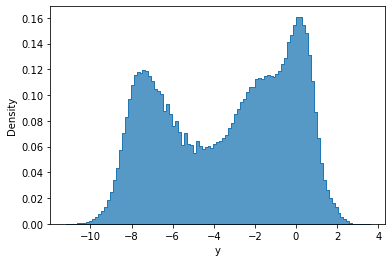

In [14]:
import seaborn as sns
N = len(y_n)
ix = np.random.rand(N) < .01
sns.histplot(y_n, element='step', stat='density')
plt.xlabel('y')

In [15]:
# Show size of compressed dataset file
file_name = 'gb1_data.csv.gz'
data_df.to_csv(file_name, compression='gzip', index=False)
print('data_df (zipped):')
!du -mh $file_name
!mv $file_name ../.

data_df (zipped):
 11M	gb1_data.csv.gz
